In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("C:/Users/Charlotte/Desktop/TSE/M2/MATHS OF DEEP LEARNING/projet_recom/steam-200k.csv",
    header=None,
    names=["userid", "game", "action", "purchase_or_hours", "useless"]
)[["userid", "game", "action", "purchase_or_hours"]]
df.head()

,userid,game,action,purchase_or_hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


Note: purchase_or_hours always takes the value "1" when the game was purchased and the number of hours played otherwise.

Missing Values

In [19]:
df.isnull().sum()

userid               0
game                 0
action               0
purchase_or_hours    0
dtype: int64

Appreciation
In this dataset, we do not have an explicit feature translating the rate of appreciation of a game by a user. Therefore, we consider that the user liked the game if he purchased it or played at least 20 hours.
God knows there are video games we hated but still played for more than 20 hours, which justifies a higher threshold. However, that would unvoluntarily discard small video games (which take few hours to complete).

Quoique je me dis ptet que c'est mieux :

3 if plays more than 50 hours (even if it's a small game, if it's really good then it can be played multiple times) purchased or not
2 if between 20 and 50 hours, purchased or not (financial reasons not allowing purchase)
1 if purchase AND less than 20 hours (likes it but not so much)
0 if no purchase AND less than 20 hours (does not like it)
on peut réduire le nombre de classes si problématique

In [20]:
df["score"] = [
    3 if df["purchase_or_hours"][i] >= 50 else
    2 if df["purchase_or_hours"][i] >= 20 and df["purchase_or_hours"][i] < 50 else
    1 if df["purchase_or_hours"][i] < 20 and df["action"][i] == "purchase" else
    0 for i in range(len(df))
]

In [21]:
df

,userid,game,action,purchase_or_hours,score
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,1
1,151603712,The Elder Scrolls V Skyrim,play,273.0,3
2,151603712,Fallout 4,purchase,1.0,1
3,151603712,Fallout 4,play,87.0,3
4,151603712,Spore,purchase,1.0,1
...,...,...,...,...,...
199995,128470551,Titan Souls,play,1.5,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,1
199997,128470551,Grand Theft Auto Vice City,play,1.5,0
199998,128470551,RUSH,purchase,1.0,1


Toy-model with TMDB Ratings (directly from https://www.kaggle.com/rounakbanik/movie-recommender-systems)

Weighted Rating (WR) = $(\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$

    - $v$ the number of scores for a game
    - $m$ the minimum number of scores required to be listed in the chart
    - $R$ the average score of a game
    - $C$ the average score across the whole games library
    
    We try a first version of the TMDB Ratings formula with $m$ defined as the 95th percentile of the score variable 
   

In [22]:
score_counts = df[df['score'].notnull()]['score'].astype('int')
score_averages = df.groupby(by = "game")["score"].mean()
C = score_averages.mean()
C

0.8224353708954674

In [36]:
score_averages
df_sa = pd.DataFrame(score_averages)
df_sa
df_sa = df_sa.reset_index()

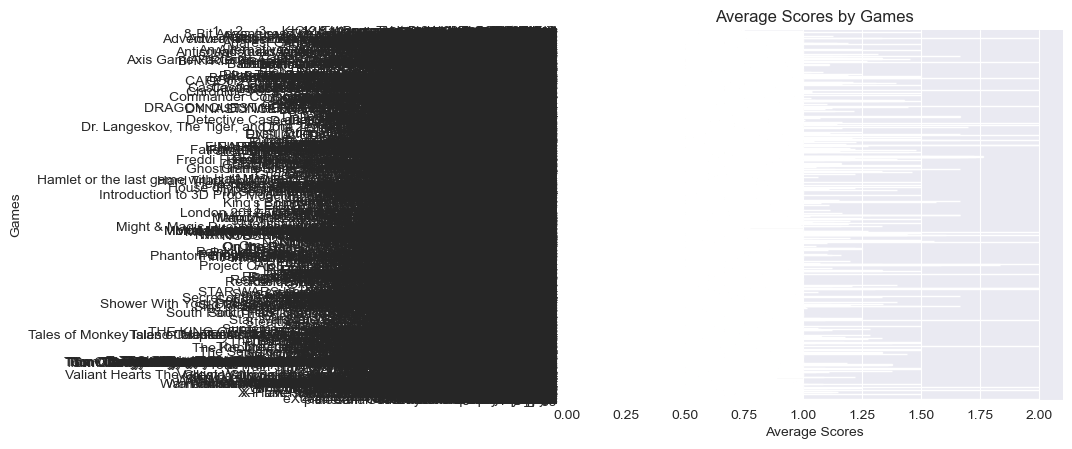

In [37]:
sns.set_style('darkgrid')
sns. set_palette ( 'Set2' )
sns.barplot(data = df_sa, x = 'score', y = 'game')
plt.title('Average Scores by Games')
plt.xlabel('Average Scores')
plt.ylabel('Games')
sns. despine ()
plt. show ()

In [38]:
m = score_counts.quantile(0.95)
m

2.0

In [39]:
qualified = df[(df['score'] >= m) & (df['score'].notnull()) & (df['score_average'].notnull())][['action', 'purchase_or_hours', 'score', 'score_average']]
qualified['score'] = qualified['score'].astype('int')
qualified['score_average'] = qualified['score_average'].astype('int')
qualified.shape

KeyError: 'score_counts'

In [44]:
score_averages

game
007 Legends                                                   0.500000
0RBITALIS                                                     0.500000
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby)    0.583333
10 Second Ninja                                               0.750000
10,000,000                                                    0.500000
                                                                ...   
sZone-Online                                                  0.637500
samurai_jazz                                                  1.000000
the static speaks my name                                     0.619048
theHunter                                                     0.680108
theHunter Primal                                              0.875000
Name: score, Length: 5155, dtype: float64